About the Traffic_Sign_-2 dataset

The dataset represents real-world road traffic signs categorized into five classes: Cautions, Crossings, Direction, No Entry, and SpeedLimit. It contains a total of X training images. The data is split into training and validation sets using an 80-20 ratio. We applied resizing (64×64), normalization, and augmentation to improve model generalization.


3.1.1 – Data Understanding, Analysis, Visualization, Cleaning:

In [1]:
# Import Libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Dataset Paths
train_path = '/content/drive/MyDrive/Colab Notebooks/Traffic_Sign_-2/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Traffic_Sign_-2/Test'

In [3]:
# Check Class Distribution
classes = os.listdir(train_path)
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}

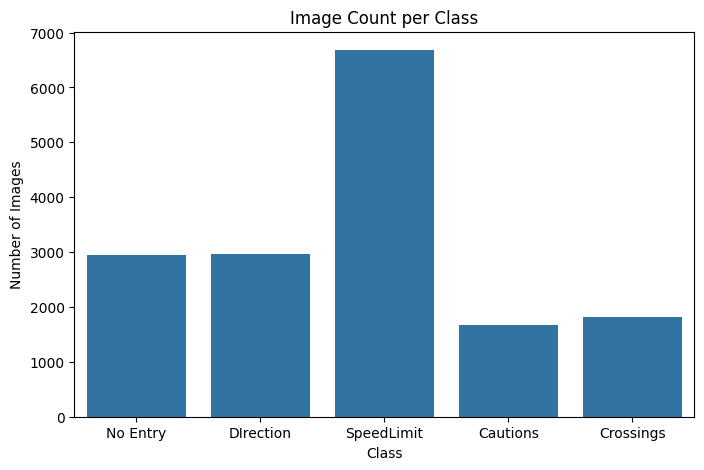

In [4]:
# Visualization of Class Distribution
plt.figure(figsize=(8,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [5]:
# Count Total Images
total_images = sum(class_counts.values())
print(f"Total Training Images: {total_images}")
print(f"Classes: {classes}")

Total Training Images: 16075
Classes: ['No Entry', 'DIrection', 'SpeedLimit', 'Cautions', 'Crossings']


3.1.1 – Data Preprocessing + Generators (with Augmentation)

We’ll:

Resize all images to 64×64

Normalize them

Use augmentation for the training set

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Size and Batch Size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

In [7]:
# Create ImageDataGenerator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,          # 80-20 split
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [8]:
# Data Generator: Train
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 12861 images belonging to 5 classes.


In [9]:
# Data Generator: Validation
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 3214 images belonging to 5 classes.


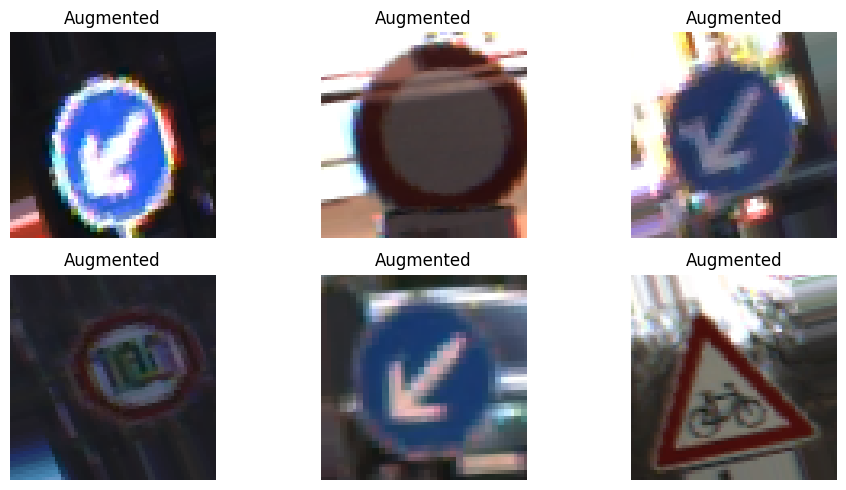

In [10]:
# Visualize Augmented Images
aug_images, aug_labels = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(aug_images[i])
    plt.title("Augmented")
    plt.axis('off')
plt.tight_layout()
plt.show()

3.1.2 – Build and Train Baseline Model
We’ll now define a CNN model with:

3 Convolution + Pooling layers

3 Dense layers

Softmax output

🧱 Model Architecture + Summary

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build Baseline CNN
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    Dense(5, activation='softmax')  # 5 output classes
])

baseline_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,314,629 (5.01 MB)

 Trainable params: 1,314,629 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

Locate the bad files

In [12]:
from pathlib import Path
from PIL import Image

def find_missing_or_corrupt(root_dir):
    bad = []
    for ext in ("*.jpg","*.jpeg","*.png","*.bmp","*.tif","*.tiff"):
        for p in Path(root_dir).rglob(ext):
            try:
                img = Image.open(p)
                img.verify()
            except Exception:
                bad.append(p)
    return bad

bad = find_missing_or_corrupt(train_path)
print("Still bad files:", bad)


Still bad files: []


Re create=ing your data generators

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale=1./255,
  validation_split=0.2,
  rotation_range=20,
  zoom_range=0.15,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.15,
  horizontal_flip=True,
  fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
  train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
  class_mode='categorical', subset='training', shuffle=True
)
val_generator = train_datagen.flow_from_directory(
  train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
  class_mode='categorical', subset='validation', shuffle=True
)


Found 12861 images belonging to 5 classes.
Found 3214 images belonging to 5 classes.


🧪 Model Compilation + Training

In [21]:
# 1) Compile as before
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2) Define callbacks immediately after compile
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    filepath='baseline_best.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 3) Train with callbacks (replacing your old fit call)
baseline_history = baseline_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,                    # increase so EarlyStopping can act
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9896 - loss: 0.0323
Epoch 1: val_loss improved from inf to 0.42232, saving model to baseline_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 86s 206ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.8967 - val_loss: 0.4223
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 2: val_loss did not improve from 0.42232
402/402 ━━━━━━━━━━━━━━━━━━━━ 80s 198ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9076 - val_loss: 0.5189
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9914 - loss: 0.0269
Epoch 3: val_loss did not improve from 0.42232
402/402 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.8899 - val_loss: 0.6150
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9961 - loss: 0.0136
Epoch 4: val_loss did not improve from 0.42232
402/402 ━━━━━━━━━━━━━━━━━━━━ 85s 211ms/step - accuracy: 0.9961 - loss: 0.0136 - val_accuracy: 0.8955 - val_loss: 0.7320
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9949 - loss: 0.0172
Epoch 5: val_loss did not i

📈 Plot Training vs. Validation Loss

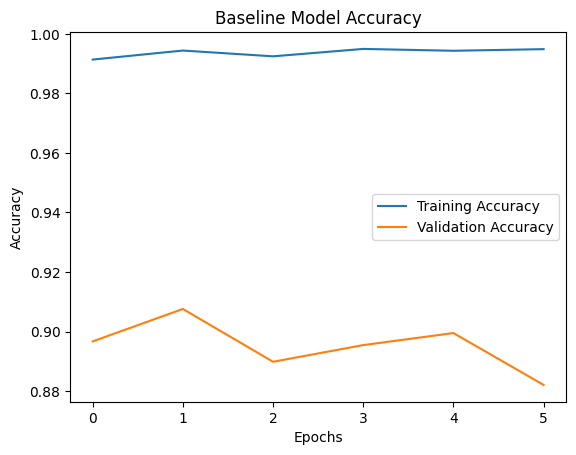

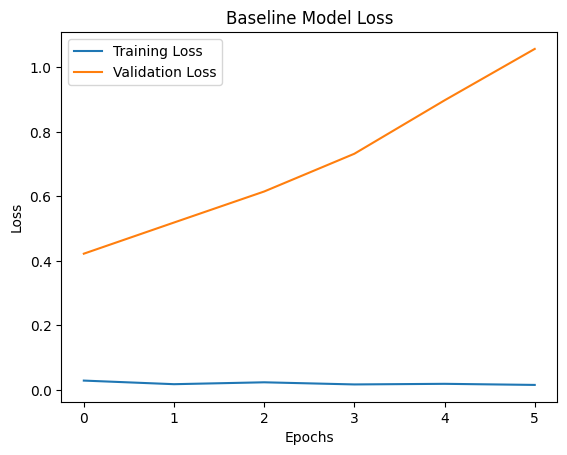

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Baseline Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.title("Baseline Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


3.1.2 – Model Evaluation (Accuracy, Precision, Recall, F1) using test predictions and classification report.

 3.1.2 – Baseline Model Evaluation
 (Accuracy, Precision, Recall, F1-Score, Predictions)

🧾 Step 1: Evaluate on Validation Set

In [23]:
val_loss, val_acc = baseline_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.9028 - loss: 0.4128
Validation Accuracy: 0.89
Validation Loss: 0.43


📊 Step 2: Classification Report & Confusion Matrix

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get true labels and predicted labels
val_generator.reset()
pred_probs = baseline_model.predict(val_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step


In [25]:
# Classification Report
print("Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

Classification Report:

              precision    recall  f1-score   support

    Cautions       0.14      0.05      0.08       334
   Crossings       0.11      0.18      0.14       364
   DIrection       0.19      0.19      0.19       592
    No Entry       0.16      0.15      0.15       588
  SpeedLimit       0.40      0.39      0.40      1336

    accuracy                           0.25      3214
   macro avg       0.20      0.20      0.19      3214
weighted avg       0.26      0.25      0.25      3214



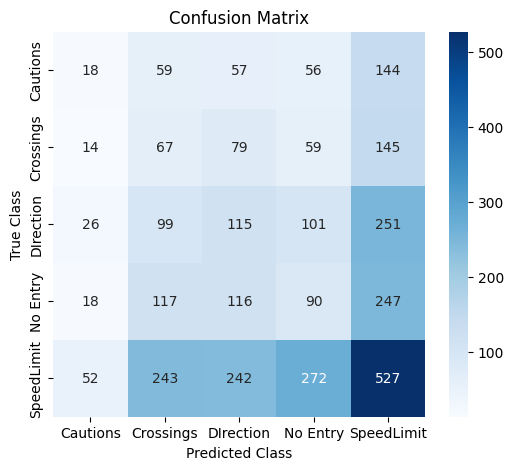

In [26]:
# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

🖼️ Step 3: Predict on Sample Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


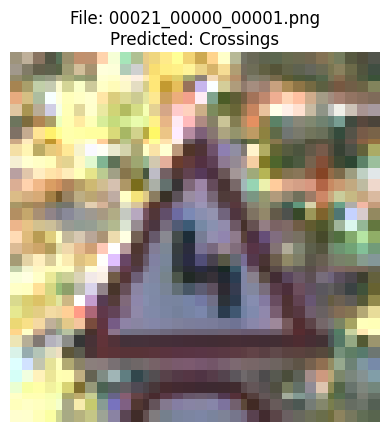

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


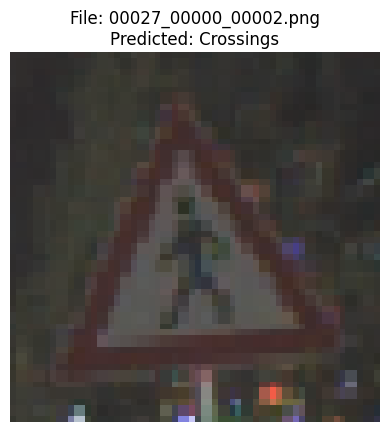

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


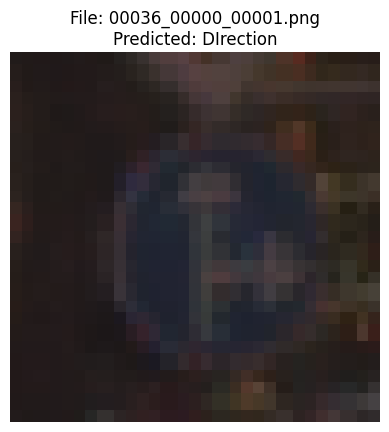

In [27]:
# 1. List only the image files in your Test folder
test_files = [
    f for f in os.listdir(test_path)
    if f.lower().endswith(('.png','.jpg','.jpeg'))
]

# 2. Pick 3 at random
for img_file in random.sample(test_files, 3):
    img_path = os.path.join(test_path, img_file)

    # 3. Load & preprocess
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 4. Predict
    pred_probs = baseline_model.predict(img_array)
    pred_label = class_labels[np.argmax(pred_probs)]

    # 5. Show
    plt.imshow(img)
    plt.title(f"File: {img_file}\nPredicted: {pred_label}")
    plt.axis('off')
    plt.show()

3.1.3 – Deeper CNN with Regularization
This model will:

Double the layers and filters compared to the baseline

Add Dropout and Batch Normalization

Use the same input shape and output size

🧱 Step 1: Build the Model

In [28]:
from tensorflow.keras.layers import BatchNormalization

# Build Deeper CNN Model
deeper_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(5, activation='softmax')
])

# Model Summary
deeper_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,080,005 (4.12 MB)

 Trainable params: 1,079,045 (4.12 MB)

 Non-trainable params: 960 (3.75 KB)

⚙️ Step 2: Compile & Train

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1) Compile your deeper model as before
deeper_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2) Define callbacks
checkpoint_cb = ModelCheckpoint(
    filepath='deeper_best.h5',   # saves best weights here
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,                  # stops if val_loss doesn’t improve for 5 epochs
    restore_best_weights=True,
    verbose=1
)

# 3) Train with callbacks (bump up epochs to let EarlyStopping kick in)
deeper_history = deeper_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9475 - loss: 0.1615
Epoch 1: val_loss improved from inf to 0.46468, saving model to deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 99s 226ms/step - accuracy: 0.9475 - loss: 0.1615 - val_accuracy: 0.8871 - val_loss: 0.4647
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9761 - loss: 0.0781
Epoch 2: val_loss improved from 0.46468 to 0.35813, saving model to deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 81s 201ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.8948 - val_loss: 0.3581
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9825 - loss: 0.0604
Epoch 3: val_loss did not improve from 0.35813
402/402 ━━━━━━━━━━━━━━━━━━━━ 84s 210ms/step - accuracy: 0.9825 - loss: 0.0603 - val_accuracy: 0.8889 - val_loss: 0.4770
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9794 - loss: 0.0740
Epoch 4: val_loss improved from 0.35813 to 0.29976, saving model to deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.9794 - loss: 0.0740 - val_accuracy: 0.9039 - val_loss: 0.2998
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9890 - loss: 0.0493
Epoch 5: val_loss did not improve from 0.29976
402/402 ━━━━━━━━━━━━━━━━━━━━ 80s 198ms/step - accuracy: 0.9890 - loss: 0.0493 - val_accuracy: 0.8936 - val_loss: 0.5237
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9920 - loss: 0.0278
Epoch 6: val_loss did not improve from 0.29976
402/402 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.9920 - loss: 0.0278 - val_accuracy: 0.8908 - val_loss: 0.3527
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9748 - loss: 0.1138
Epoch 7: val_loss did not improve from 0.29976
402/402 ━━━━━━━━━━━━━━━━━━━━ 78s 193ms/step - accuracy: 0.9748 - loss: 0.1137 - val_accuracy: 0.8815 - val_loss: 0.8451
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9928 - loss: 0.0270
Epoch 8: val_loss did not i

📈 Step 3: Plot Accuracy & Loss

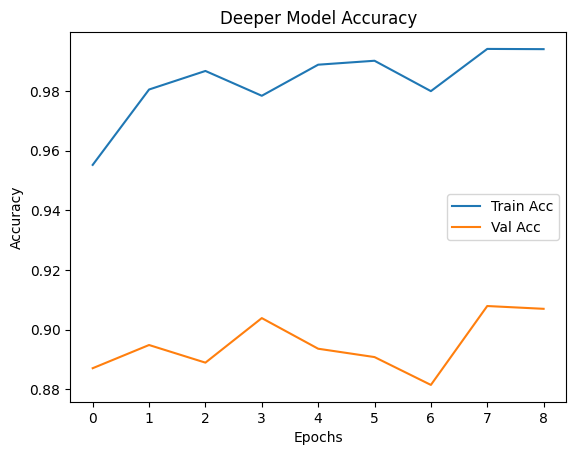

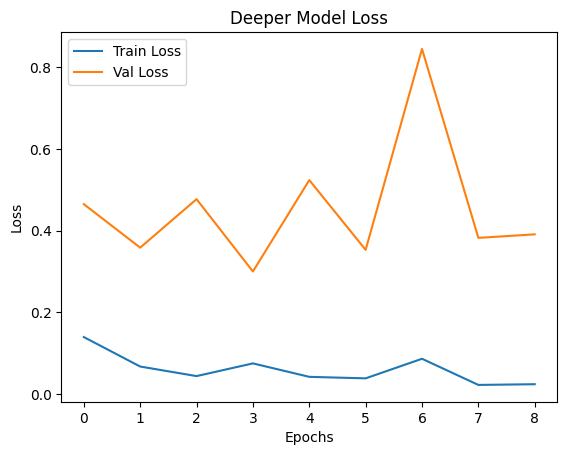

In [31]:
# Accuracy
plt.plot(deeper_history.history['accuracy'], label='Train Acc')
plt.plot(deeper_history.history['val_accuracy'], label='Val Acc')
plt.title("Deeper Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(deeper_history.history['loss'], label='Train Loss')
plt.plot(deeper_history.history['val_loss'], label='Val Loss')
plt.title("Deeper Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


 3.1.3 – Deeper Model Evaluation (Accuracy, Precision, Recall, F1)

🧾 Step 1: Evaluate on Validation Set

In [32]:
val_loss_deep, val_acc_deep = deeper_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc_deep:.2f}")
print(f"Validation Loss: {val_loss_deep:.2f}")


101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.8969 - loss: 0.3448
Validation Accuracy: 0.90
Validation Loss: 0.33


📊 Step 2: Classification Report & Confusion Matrix

101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step
Classification Report:

              precision    recall  f1-score   support

    Cautions       0.08      0.06      0.07       334
   Crossings       0.12      0.15      0.13       364
   DIrection       0.17      0.16      0.16       592
    No Entry       0.20      0.21      0.20       588
  SpeedLimit       0.42      0.41      0.41      1336

    accuracy                           0.26      3214
   macro avg       0.20      0.20      0.20      3214
weighted avg       0.26      0.26      0.26      3214



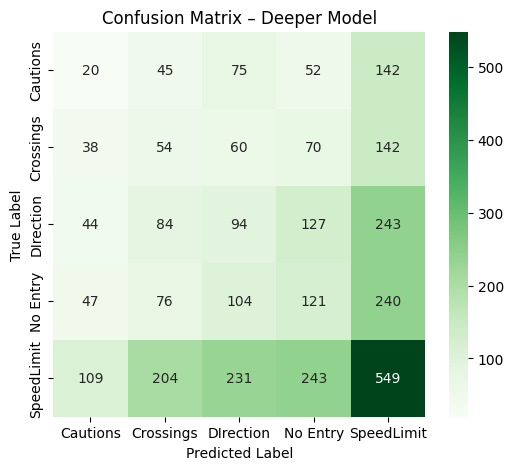

In [33]:
# Reset validation generator
val_generator.reset()

# Predict classes
deep_preds = deeper_model.predict(val_generator)
deep_pred_classes = np.argmax(deep_preds, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n")
print(classification_report(true_classes, deep_pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, deep_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix – Deeper Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


3.1.4 – Experimentation: Optimizer Comparison (SGD vs Adam)
We’ll retrain the same deeper model architecture, but this time using SGD and compare with the one trained using Adam earlier.

⚙️ Step 1: Compile the Deeper Model with SGD

In [35]:
import time

# 1) Build & compile via your factory function
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
sgd_model = create_deeper_model(sgd_optimizer)

# 2) Define callbacks
checkpoint_cb = ModelCheckpoint(
    'sgd_deeper_best.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 3) Train with callbacks and timing
start = time.time()
sgd_history = sgd_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,                    # give EarlyStopping room
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)
print(f"SGD deeper model training time: {(time.time() - start)/60:.2f} minutes")


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6107 - loss: 1.1025
Epoch 1: val_loss improved from inf to 0.36543, saving model to sgd_deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 98s 212ms/step - accuracy: 0.6110 - loss: 1.1016 - val_accuracy: 0.8186 - val_loss: 0.3654
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8764 - loss: 0.2833
Epoch 2: val_loss improved from 0.36543 to 0.33388, saving model to sgd_deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 90s 225ms/step - accuracy: 0.8765 - loss: 0.2832 - val_accuracy: 0.8491 - val_loss: 0.3339
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9376 - loss: 0.1590
Epoch 3: val_loss did not improve from 0.33388
402/402 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.9377 - loss: 0.1589 - val_accuracy: 0.8553 - val_loss: 0.3936
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9618 - loss: 0.1169
Epoch 4: val_loss improved from 0.33388 to 0.28332, saving model to sgd_deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 86s 209ms/step - accuracy: 0.9618 - loss: 0.1169 - val_accuracy: 0.8961 - val_loss: 0.2833
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9788 - loss: 0.0671
Epoch 5: val_loss improved from 0.28332 to 0.26653, saving model to sgd_deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 198ms/step - accuracy: 0.9788 - loss: 0.0671 - val_accuracy: 0.9194 - val_loss: 0.2665
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9874 - loss: 0.0439
Epoch 6: val_loss improved from 0.26653 to 0.16177, saving model to sgd_deeper_best.h5


402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 196ms/step - accuracy: 0.9874 - loss: 0.0439 - val_accuracy: 0.9334 - val_loss: 0.1618
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9870 - loss: 0.0420
Epoch 7: val_loss did not improve from 0.16177
402/402 ━━━━━━━━━━━━━━━━━━━━ 80s 198ms/step - accuracy: 0.9870 - loss: 0.0420 - val_accuracy: 0.9163 - val_loss: 0.3058
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9888 - loss: 0.0313
Epoch 8: val_loss did not improve from 0.16177
402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.9888 - loss: 0.0313 - val_accuracy: 0.8986 - val_loss: 0.4597
Epoch 9/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9904 - loss: 0.0320
Epoch 9: val_loss did not improve from 0.16177
402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9054 - val_loss: 0.4533
Epoch 10/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9937 - loss: 0.0196
Epoch 10: val_loss did not

📈 Step 2: Plot SGD vs Adam Accuracy

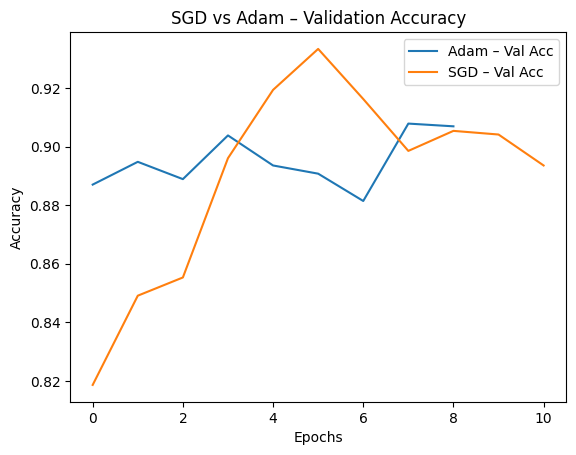

In [36]:
# Compare optimizers
plt.plot(deeper_history.history['val_accuracy'], label='Adam – Val Acc')
plt.plot(sgd_history.history['val_accuracy'], label='SGD – Val Acc')
plt.title("SGD vs Adam – Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Extra to measure total training Time


In [37]:
import time

start = time.time()
deeper_history = deeper_model.fit(
    train_generator, validation_data=val_generator, epochs=10, verbose=1
)
end = time.time()
print(f"Deeper model training time: {(end - start)/60:.2f} minutes")

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.9873 - loss: 0.0441 - val_accuracy: 0.8780 - val_loss: 0.3846
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 196ms/step - accuracy: 0.9858 - loss: 0.0473 - val_accuracy: 0.9020 - val_loss: 0.6702
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 82s 196ms/step - accuracy: 0.9908 - loss: 0.0423 - val_accuracy: 0.8777 - val_loss: 0.5111
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 79s 196ms/step - accuracy: 0.9895 - loss: 0.0388 - val_accuracy: 0.8886 - val_loss: 0.5564
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 78s 195ms/step - accuracy: 0.9933 - loss: 0.0239 - val_accuracy: 0.9104 - val_loss: 0.3365
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 84s 209ms/step - accuracy: 0.9939 - loss: 0.0249 - val_accuracy: 0.8699 - val_loss: 0.7895
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 83s 206ms/step - accuracy: 0.9875 - loss: 0.0608 - val_accuracy: 0.8908 - val_loss: 1.2142
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - accuracy: 0.9943 - loss: 0